In [1]:
#Author: Nabil Shawkat

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Reference: 
# https://www.kaggle.com/beksultankarimov/global-earthquakes-2020-clean?select=data_clean.csv
path = "data\data_clean.csv"
mag = pd.read_csv(path)

In [3]:
mag.columns

Index(['Unnamed: 0', 'date_time_utc', 'latitude', 'longitude', 'depth',
       'magnitude_type', 'magnitude', 'region_name', 'Countries'],
      dtype='object')

In [4]:
mag.describe()


,Unnamed: 0,latitude,longitude,depth,magnitude
count,90906.000000,90906.000000,90906.000000,90906.000000,90906.000000
mean,45452.500000,20.483158,-34.126006,33.924768,3.066322
std,26242.446123,23.568212,91.270396,66.002067,0.839945
min,0.000000,-69.560000,-179.990000,-4.000000,0.300000
25%,22726.250000,12.472500,-101.670000,7.000000,2.400000
50%,45452.500000,19.210000,-67.020000,10.000000,3.000000
75%,68178.750000,38.170000,27.357500,31.000000,3.600000
max,90905.000000,87.370000,180.000000,750.000000,7.800000


In [5]:
mag['year'] = pd.DatetimeIndex(mag['date_time_utc']).year

In [6]:
mag.columns

Index(['Unnamed: 0', 'date_time_utc', 'latitude', 'longitude', 'depth',
       'magnitude_type', 'magnitude', 'region_name', 'Countries', 'year'],
      dtype='object')

In [7]:
mag20= mag[mag["year"]==2020]
mag_US= mag20[mag20["Countries"]== "U.S."]
mag_US.groupby("region_name").describe()["magnitude"]


,count,mean,std,min,25%,50%,75%,max
region_name,,,,,,,,
ALABAMA,7.0,2.657143,0.562308,2.1,2.350,2.50,2.75,3.8
ALASKA PENINSULA,395.0,3.444557,0.749172,2.3,2.900,3.30,3.80,7.8
ARIZONA,22.0,2.704545,0.395784,2.0,2.500,2.65,2.95,3.5
ARKANSAS,65.0,2.353846,0.296899,2.0,2.100,2.30,2.50,3.7
CALIFORNIA,4942.0,2.453683,0.523325,2.0,2.100,2.30,2.60,5.8
...,...,...,...,...,...,...,...,...
WESTERN MONTANA,118.0,2.377119,0.370126,2.0,2.100,2.30,2.50,3.9
WESTERN TEXAS,280.0,2.803571,0.372709,2.0,2.575,2.70,3.00,5.0
WYOMING,30.0,2.550000,0.493230,2.0,2.100,2.45,2.80,3.7


In [8]:
total_mag = mag_US.groupby("region_name").sum()["magnitude"]
total_mag_6 = total_mag.sort_values(ascending=False).head(6)
postal_abbr = {'PUERTO RICO REGION':'PR Region','CALIFORNIA':'CA','ISLAND OF HAWAII, HAWAII':'HI',
               'NEVADA':'NV','PUERTO RICO':'PR','SOUTHERN IDAHO':'Southern ID'}
total_mag_6


region_name
PUERTO RICO REGION          18090.1
CALIFORNIA                  12126.1
ISLAND OF HAWAII, HAWAII     8358.8
NEVADA                       8345.0
PUERTO RICO                  5629.0
SOUTHERN IDAHO               5265.7
Name: magnitude, dtype: float64

In [9]:
total_mag_6_r = total_mag_6.rename(index = postal_abbr)
1

1

Text(0.5, 1.0, 'SOUTHERN IDAHO')

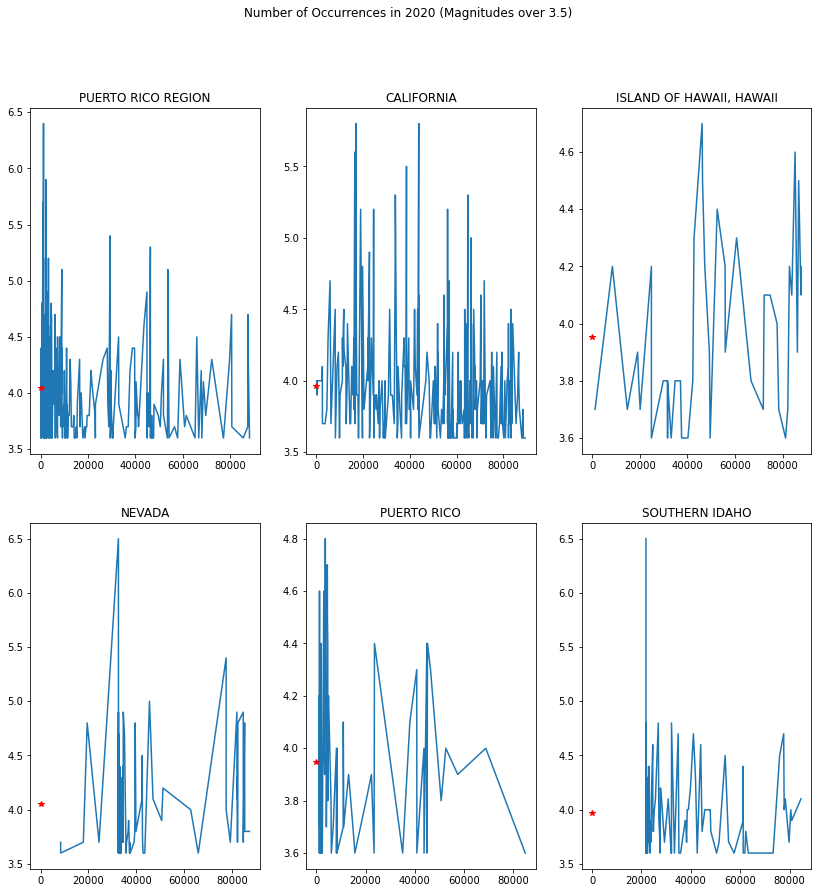

In [10]:
pr_region = mag_US[mag_US["region_name"]=="PUERTO RICO REGION"]
ca = mag_US[mag_US["region_name"]=="CALIFORNIA"]
hi = mag_US[mag_US["region_name"]=="ISLAND OF HAWAII, HAWAII"]
nv = mag_US[mag_US["region_name"]=="NEVADA"]
pr = mag_US[mag_US["region_name"]=="PUERTO RICO"]
southern_id = mag_US[mag_US["region_name"]=="SOUTHERN IDAHO"]

mag_US_3 = mag_US[mag_US["magnitude"]>3.5]
avg_mag = mag_US_3.groupby("region_name").mean()["magnitude"]

pr_region = pr_region[pr_region["magnitude"]>3.5]
ca = ca[ca["magnitude"]>3.5]
hi = hi[hi["magnitude"]>3.5]
nv = nv[nv["magnitude"]>3.5]
pr = pr[pr["magnitude"]>3.5]
southern_id = southern_id[southern_id["magnitude"]>3.5]

fig = plt.figure(figsize=(14,14))
fig.suptitle("Number of Occurrences in 2020 (Magnitudes over 3.5)")
axes1 = fig.add_subplot(231)
axes2 = fig.add_subplot(232)
axes3 = fig.add_subplot(233)
axes4 = fig.add_subplot(234)
axes5 = fig.add_subplot(235)
axes6 = fig.add_subplot(236)

axes1.plot(pr_region.index,pr_region["magnitude"])
axes2.plot(ca.index,ca["magnitude"])
axes3.plot(hi.index,hi["magnitude"])
axes4.plot(nv.index,nv["magnitude"])
axes5.plot(pr.index,pr["magnitude"])
axes6.plot(southern_id.index,southern_id["magnitude"])

axes1.plot(avg_mag['PUERTO RICO REGION'], "r*")
axes2.plot(avg_mag['CALIFORNIA'], "r*")
axes3.plot(avg_mag['ISLAND OF HAWAII, HAWAII'], "r*")
axes4.plot(avg_mag['NEVADA'], "r*")
axes5.plot(avg_mag['PUERTO RICO'], "r*")
axes6.plot(avg_mag['SOUTHERN IDAHO'], "r*")



axes1.set_title("PUERTO RICO REGION")
axes2.set_title("CALIFORNIA")
axes3.set_title("ISLAND OF HAWAII, HAWAII")
axes4.set_title("NEVADA")
axes5.set_title("PUERTO RICO")
axes6.set_title("SOUTHERN IDAHO")
